<a href="https://colab.research.google.com/github/mohit-31/HackNITP3.0/blob/main/Climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('filename.csv')
df=df[['temp(cel)','mean_windspeed(km/hr)','re_hum(%)','cloud(okta)','rain(mm)','avg._no._rainyday','district','month_index']]

In [3]:
df['district'].unique()

array(['Bhagalpur', 'chapra', 'Darbhanga', 'Dehri', 'Forbesganj', 'Gaya',
       'jamui', 'Motihari', 'Muzaffarpur', 'patna', 'Purnea', 'Raxaul',
       'Sabour', 'Supaul'], dtype=object)

In [4]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
df['district']=lb.fit_transform(df['district'])

In [5]:
df['district'].unique()

array([ 0, 11,  1,  2,  3,  4, 12,  5,  6, 13,  7,  8,  9, 10])

In [6]:
df

,temp(cel),mean_windspeed(km/hr),re_hum(%),cloud(okta),rain(mm),avg._no._rainyday,district,month_index
0,12.571663,4.861222,77.267091,1.525148,14.375759,0.9,0,1
1,16.876908,4.658724,76.001416,1.749436,13.976031,0.9,0,1
2,15.775776,3.505728,79.321824,1.713624,12.331613,0.9,0,1
3,12.903226,3.196545,79.323649,1.591761,12.337610,0.9,0,1
4,16.829754,4.926399,78.572965,1.469696,12.780349,0.9,0,1
...,...,...,...,...,...,...,...,...
5105,22.921990,1.056778,86.740943,0.523402,2.164579,0.4,10,12
5106,22.700828,1.516224,83.216797,0.600504,5.536653,0.4,10,12
5107,17.960705,2.402960,84.923203,0.599858,4.497545,0.4,10,12
5108,25.074912,0.815435,85.353020,0.590177,3.974889,0.4,10,12


In [7]:
df = df.sample(frac = 1) 
df

,temp(cel),mean_windspeed(km/hr),re_hum(%),cloud(okta),rain(mm),avg._no._rainyday,district,month_index
2810,30.777883,5.247614,84.989842,6.490830,324.330119,12.8,6,7
316,15.809439,3.138271,78.215229,1.448087,9.214586,0.7,7,1
202,19.374440,3.107292,79.872944,0.693097,12.571135,0.9,12,1
645,20.809702,3.489485,71.472429,1.109230,11.417148,1.1,5,2
2153,28.494774,7.561851,72.987087,3.850474,122.169274,6.0,11,6
...,...,...,...,...,...,...,...,...
4223,29.253810,3.676227,81.136838,2.632943,71.111147,4.0,9,10
4376,22.267920,3.369794,76.612637,1.056184,4.026521,0.3,3,11
3090,28.669500,3.878296,81.643784,6.038731,263.893410,14.0,2,8
3521,30.867021,3.455907,79.826189,4.549455,210.786580,9.5,2,9


In [8]:
X=df[['temp(cel)','mean_windspeed(km/hr)','re_hum(%)','cloud(okta)','rain(mm)','avg._no._rainyday']]
y1=df[['district']]
y2=df[['month_index']]

In [9]:
X1=X.iloc[:,:-1].values 
X1.shape
X.shape
y1.shape

(5110, 1)

In [10]:

y12=df['district'].values
y12.size

5110

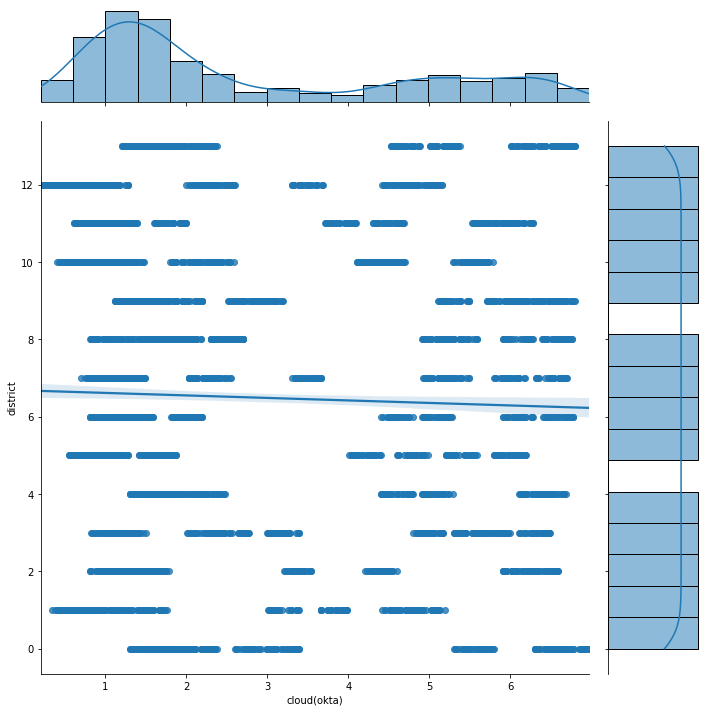

In [11]:
# X=df[['temp(cel)','mean_windspeed(km/hr)','re_hum(%)','cloud(okta)','rain(mm)','avg._no._rainyday']]

sns.jointplot(x='cloud(okta)',y='district',data=df,kind='reg',height=10)
plt.show();

In [12]:
corr_matrix=X.corr()
pd.options.display.float_format='{:,.2f}'.format
corr_matrix

,temp(cel),mean_windspeed(km/hr),re_hum(%),cloud(okta),rain(mm),avg._no._rainyday
temp(cel),1.00,0.52,-0.02,0.48,0.45,0.47
mean_windspeed(km/hr),0.52,1.00,-0.07,0.47,0.39,0.41
re_hum(%),-0.02,-0.07,1.00,0.50,0.50,0.49
cloud(okta),0.48,0.47,0.50,1.00,0.94,0.96
rain(mm),0.45,0.39,0.50,0.94,1.00,0.99
avg._no._rainyday,0.47,0.41,0.49,0.96,0.99,1.00


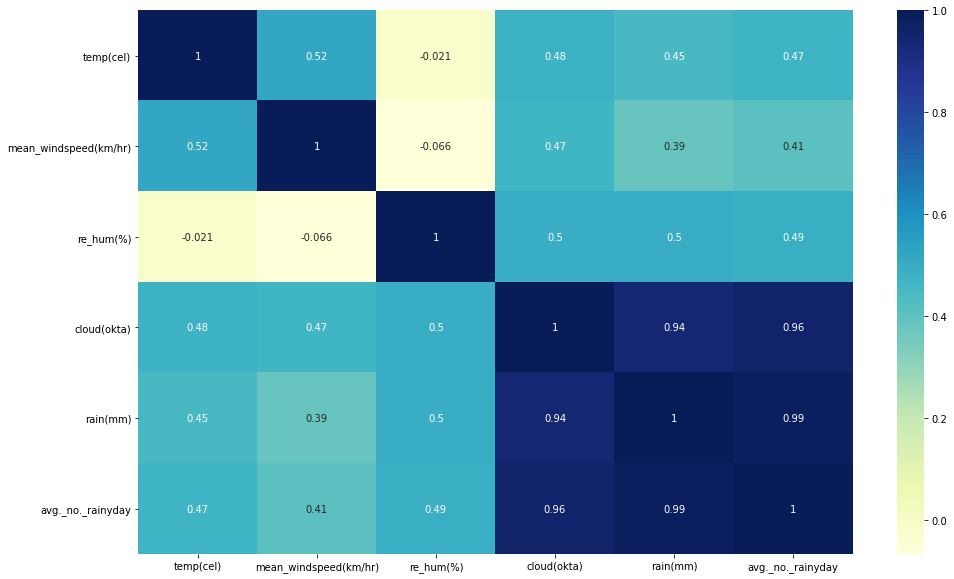

In [13]:
plt.figure(figsize=(16,10 ))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

In [14]:
eignvalues,eignvectors = np.linalg.eig(X.corr())

In [15]:
pd.Series(eignvalues).sort_values()

4   0.01
5   0.06
3   0.41
2   0.48
1   1.32
0   3.72
dtype: float64

In [16]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X,y1)

In [17]:
# Xv = X.values.reshape(-1,1)
# # y1=y1.values.reshape(-1,1)

# h=.02
# x_min,x_max = Xv.min(),Xv.max() + 1
# y_min,y_max = y1.min(),y1.max() + 1
# Xv

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y1,test_size=.1,random_state=42)
clf = clf.fit(X_train,y_train)

In [19]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9412915851272016

In [20]:
import joblib as jb
jb.dump(clf,"filer.csv")


['filer.csv']

In [21]:
# 'temp(cel)','mean_windspeed(km/hr)','re_hum(%)','cloud(okta)','rain(mm)','avg._no._rainyday']]
# y1=df[['district']]
Xm=[[22.42,	1.22,	808.81,	1.06,	7.16,	0.80]]
t=clf.predict(Xm)
t

array([10])

In [22]:
clf=jb.load("filer.csv")
xm=[[-0.02,-0.07,10.00	,010.50,	10.50,	10.49
]]
k=clf.predict(xm)
lb.inverse_transform(k)

array(['Dehri'], dtype=object)

In [35]:

xm=[[-0.02,10.07,100.00	,.50,	10.50,	1.49
]]
k=clf.predict(xm)
lb.inverse_transform(k)

array(['Supaul'], dtype=object)

In [36]:
xm=[[10.02,-0.07,100.00	,.50,	10.50,	1.49
]]
k=clf.predict(xm)
lb.inverse_transform(k)

array(['Purnea'], dtype=object)

In [37]:
xm=[[10.02,-0.07,10.00	,.50,	10.50,	1.49
]]
k=clf.predict(xm)
lb.inverse_transform(k)

array(['Motihari'], dtype=object)

In [40]:
xm=[[10.02,-0.07,100.00	,10.50,	10.50,	1.49
]]
k=clf.predict(xm)
lb.inverse_transform(k)


array(['Raxaul'], dtype=object)